
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E02_sklearn.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Scikit-learn exercises 

---
These are introductory exercises in Machine learning with focus in **scikit-learn** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. EDA (*) (Exploratory Data Analysis)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon. 

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

&nbsp; c) Make some plots on some of the columns that you find interesting.

&nbsp; d) Check if there are any columns you might want to drop. 

<details>

<summary>Answer</summary>

a) I have chosen to drop the rows, but it doesn't neccessary have to be the best method. Maybe some NaNs should be filled somehow?

b)
|      |      mpg |   cylinders |   displacement |   horsepower |   weight |   acceleration |
|:-----|---------:|------------:|---------------:|-------------:|---------:|---------------:|
| mean | 23.4459  |     5.47194 |        194.412 |     104.469  | 2977.58  |       15.5413  |
| std  |  7.80501 |     1.70578 |        104.644 |      38.4912 |  849.403 |        2.75886 |
| min  |  9       |     3       |         68     |      46      | 1613     |        8       |
| 25%  | 17       |     4       |        105     |      75      | 2225.25  |       13.775   |
| 50%  | 22.75    |     4       |        151     |      93.5    | 2803.5   |       15.5     |
| 75%  | 29       |     8       |        275.75  |     126      | 3614.75  |       17.025   |
| max  | 46.6     |     8       |        455     |     230      | 5140     |       24.8     |


c) Here are some example plots

<img src="../assets/EDA_mpg.png" height="400"/>

d) I have chosen to drop the columns origin and name. Think yourself if it is reasonable and feel free to experiment. Also there might be some domain experts in our class, that you can ask. 

</details>

---

In [52]:
# Importera nödvändiga moduler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

# Ladda Iris-dataset
df = sns.load_dataset("mpg")
#iris = load_iris()
#X, y = iris.data, iris.target

# Dela upp datasetet i tränings- och testuppsättningar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skapa en logistisk regressionsmodell
model = LogisticRegression()

# Träna modellen på träningsdata
model.fit(X_train, y_train)

# Gör förutsägelser på testdata
predictions = model.predict(X_test)

# Utvärdera modellen genom att beräkna noggrannheten
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

df = sns.load_dataset("mpg")
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [20]:
df.info

"""Antalet rader och kolumner i dataramen (398 rader, 9 kolumner).
Namnen på varje kolumn och vilken typ av data de innehåller (t.ex. "mpg" innehåller flyttal, 
"cylinders" innehåller heltal, och så vidare).
Eventuella saknade värden i varje kolumn (om några saknas, visas det som antalet saknade värden 
för varje kolumn).
Datatyper för varje kolumn (t.ex. flyttal, heltal, strängar)."""

'Antalet rader och kolumner i dataramen (398 rader, 9 kolumner).\nNamnen på varje kolumn och vilken typ av data de innehåller (t.ex. "mpg" innehåller flyttal, \n"cylinders" innehåller heltal, och så vidare).\nEventuella saknade värden i varje kolumn (om några saknas, visas det som antalet saknade värden \nför varje kolumn).\nDatatyper för varje kolumn (t.ex. flyttal, heltal, strängar).'

In [21]:
df.describe
"""Antal observationer (rader): Antalet icke-saknade observationer för varje kolumn.
Medelvärde: Medelvärdet för varje kolumn.
Standardavvikelse: Standardavvikelsen för varje kolumn, vilket ger en uppfattning 
om variationen i data.
Minsta värde: Det minsta värdet för varje kolumn.
25:e percentilen (Q1): Värdet där 25% av observationerna är mindre än detta.
50:e percentilen (Median eller Q2): Värdet där 50% av observationerna är mindre än detta, 
vilket är samma som medianen.
75:e percentilen (Q3): Värdet där 75% av observationerna är mindre än detta.
Största värde: Det största värdet för varje kolumn."""


'Antal observationer (rader): Antalet icke-saknade observationer för varje kolumn.\nMedelvärde: Medelvärdet för varje kolumn.\nStandardavvikelse: Standardavvikelsen för varje kolumn, vilket ger en uppfattning \nom variationen i data.\nMinsta värde: Det minsta värdet för varje kolumn.\n25:e percentilen (Q1): Värdet där 25% av observationerna är mindre än detta.\n50:e percentilen (Median eller Q2): Värdet där 50% av observationerna är mindre än detta, \nvilket är samma som medianen.\n75:e percentilen (Q3): Värdet där 75% av observationerna är mindre än detta.\nStörsta värde: Det största värdet för varje kolumn.'

- Ta bort observationer: Om antalet saknade värden är relativt litet i förhållande till datamängden och förlusten av dessa observationer inte väsentligt påverkar analysen, kan man välja att helt enkelt ta bort raderna där saknade värden förekommer. Detta görs med metoden dropna() i pandas.

- Fyll i saknade värden med medelvärde, median eller median: Man kan fylla i saknade värden med medelvärdet, medianen eller modet av de återstående värdena i kolumnen. Detta görs med hjälp av metoden fillna() i pandas.

- Prediktera saknade värden med en modell: Om datamängden är tillräckligt stor och det finns tillräckligt med information i de andra kolumnerna, kan man använda maskininlärningsalgoritmer som linjär regression eller KNN för att förutsäga de saknade värdena.

- Använda affärslogik eller domänkunskap: Ibland kan saknade värden ersättas med specifika värden baserade på affärslogik eller domänkunskap. Till exempel kan man ersätta saknade värden för åldern med medelåldern för den aktuella populationen.

- Valet av strategi beror på datamängdens storlek, naturen av de saknade värdena och hur de påverkar analysen. Det är viktigt att noggrant överväga vilken strategi som är mest lämplig för den specifika situationen.

In [22]:
df.shape

(398, 9)

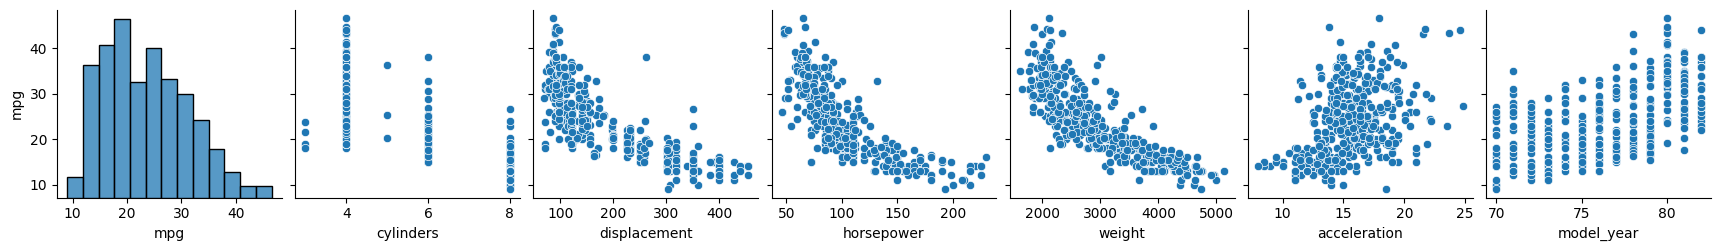

In [23]:
sns.pairplot(df, y_vars = "mpg");

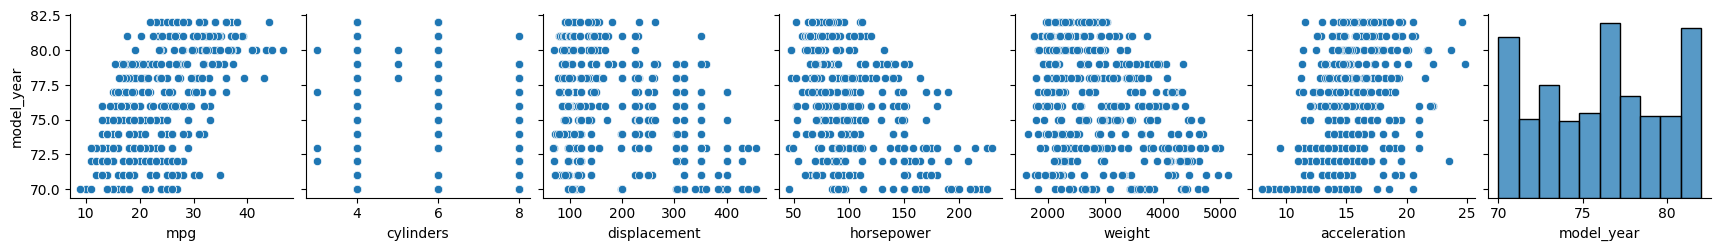

In [24]:
sns.pairplot(df, y_vars = "model_year");

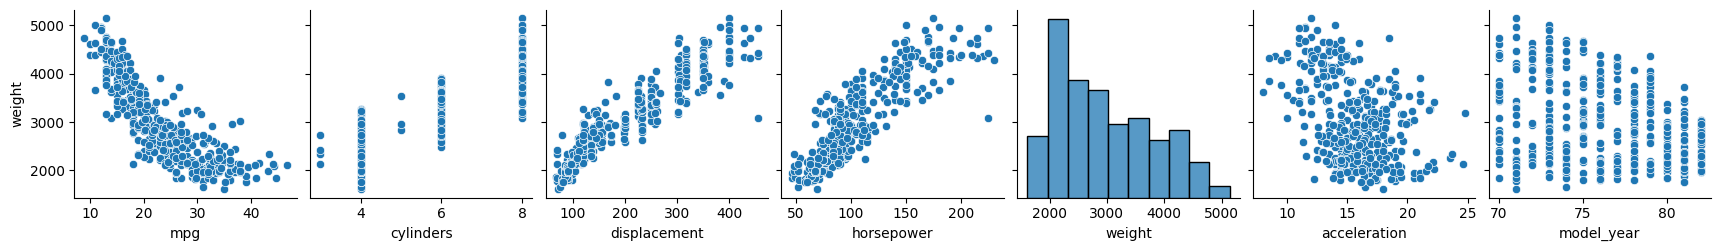

In [25]:
sns.pairplot(df, y_vars = "weight");

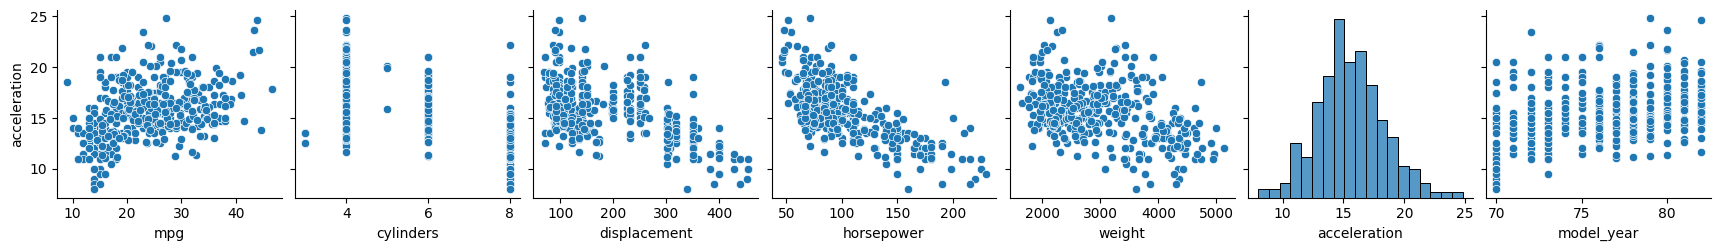

In [26]:
sns.pairplot(df, y_vars = "acceleration");

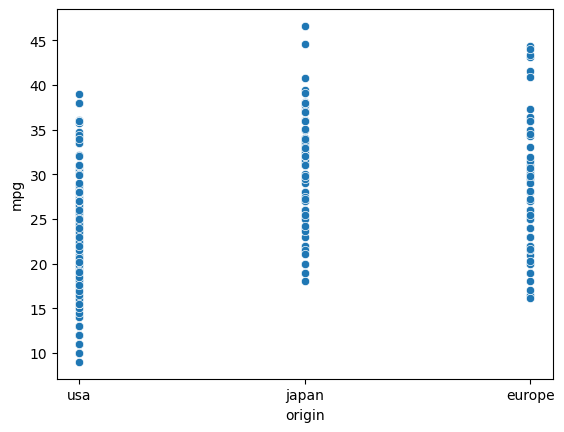

In [27]:
sns.scatterplot(df, x = "origin", y = "mpg");

In [28]:
#B
df.dropna(inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


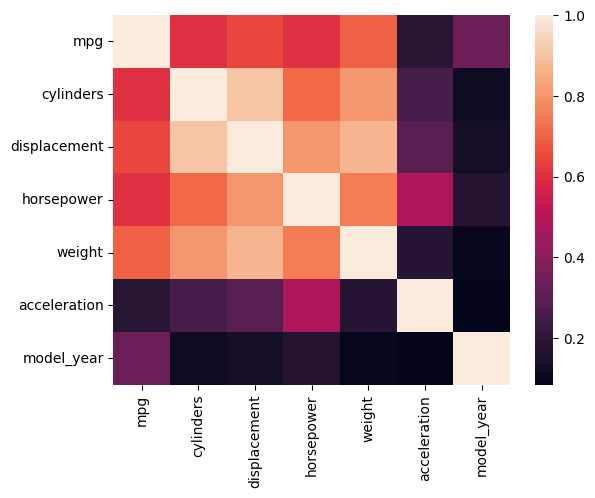

In [29]:
#C
correlation = df.corr(numeric_only = True)**2

sns.heatmap(correlation);

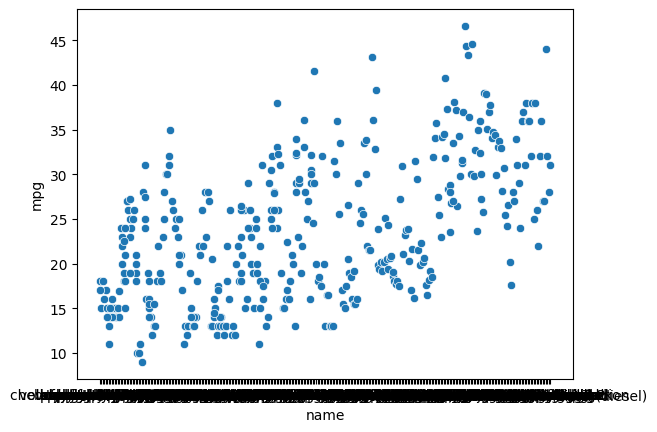

In [30]:
#D
sns.scatterplot(df, x = "name", y = "mpg");

## 1. Train|test split (*) ("Miles Per Gallon")

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

<details>

<summary>Answer</summary>

Do a manual calculation to check against the shapes after train|test split. 

</details>

---

In [31]:
X = df[["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]]
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape # adds up to 392, same as amt samples

((313, 6), (79, 6), (313,), (79,))

## 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

<details>

<summary>Answer</summary>

MAE 2.50

MSE 10.50

RMSE 3.24

</details>

In [32]:
def evaluate(X_train, X_test, y_train, y_test, model):

    # training model
    model.fit(X_train, y_train)

    # predicting y-values based on X-values
    y_pred = model.predict(X_test)
    
    # calculating evaluation metrics
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)

    return MAE, MSE, RMSE

In [33]:
model = LinearRegression()

evaluate(X_train, X_test, y_train, y_test, model)

(2.503860089776125, 10.502370329417303, 3.2407360783342574)

---
## 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

<details>

<summary>Answer</summary>

|      |   Linear regr. SVD |   Linear regr. SVD scaled |   Linear regr. SGD |   Polynom. regr. deg 1 |   Polynom. regr. deg 2 |   Polynom. regr. deg 3 |
|:-----|-------------------:|--------------------------:|-------------------:|-----------------------:|-----------------------:|-----------------------:|
| mae  |            2.50386 |                   2.50386 |            2.53515 |                2.50386 |                1.98048 |                2.11788 |
| mse  |           10.5024  |                  10.5024  |           10.8908  |               10.5024  |                7.41986 |                9.27353 |
| rmse |            3.24074 |                   3.24074 |            3.30012 |                3.24074 |                2.72394 |                3.04525 |

</details>

---

In [34]:
df_metrics = pd.DataFrame()

scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [35]:
# LinearRegression
model = LinearRegression()

linreg = evaluate(X_train, X_test, y_train, y_test, model)

df_metrics["linreg"] = linreg

df_metrics

linreg
0   2.503860
1  10.502370
2   3.240736

In [36]:
#Linear Regression Scaled Values
model = LinearRegression()

scaled_linreg = evaluate(scaled_X_train, scaled_X_test, y_train, y_test, model)

df_metrics["scaled_linreg"] = scaled_linreg

df_metrics

linreg  scaled_linreg
0   2.503860       2.503860
1  10.502370      10.502370
2   3.240736       3.240736

In [37]:
#Stochastic Gradient Descent (Scaled Values)
model = SGDRegressor(loss = "squared_error", learning_rate="invscaling", max_iter = 10000, random_state = 42)

# NOTE: SGD needs to use scaled values
sgd = evaluate(scaled_X_train, scaled_X_test, y_train, y_test, model)

df_metrics["SGD"] = sgd

df_metrics

linreg  scaled_linreg        SGD
0   2.503860       2.503860   2.567729
1  10.502370      10.502370  11.185415
2   3.240736       3.240736   3.344460

In [38]:
#Polynomial Regression (Degree 1-3)
model = LinearRegression()

for i in range(1,4):
    poly = PolynomialFeatures(degree = i, include_bias = False)
    
    poly_X_train = poly.fit_transform(X_train)
    poly_X_test = poly.transform(X_test)

    poly = evaluate(poly_X_train, poly_X_test, y_train, y_test, model)

    df_metrics[f"poly{str(i)}"] = poly

df_metrics

linreg  scaled_linreg        SGD      poly1     poly2     poly3
0   2.503860       2.503860   2.567729   2.503860  1.980477  2.117870
1  10.502370      10.502370  11.185415  10.502370  7.419858  9.273495
2   3.240736       3.240736   3.344460   3.240736  2.723942  3.045241

In [39]:
#Model Evaluation
#Lowest mean of MAE, MSE, RMSE should be the model that fits this problem the best

df_metrics.mean().sort_values()

poly2            4.041426
poly3            4.812202
poly1            5.415655
linreg           5.415655
scaled_linreg    5.415655
SGD              5.699202
dtype: float64

In [40]:
#Model Evaluation
#Lowest mean of MAE, MSE, RMSE should be the model that fits this problem the best

df_metrics.mean().sort_values()

poly2            4.041426
poly3            4.812202
poly1            5.415655
linreg           5.415655
scaled_linreg    5.415655
SGD              5.699202
dtype: float64

In [41]:
df_metrics.mean().mean()

5.133299312049513


## 4. Further explorations (**)

Feel free to further explore the dataset, for example you could choose to 
- drop different columns
- find out feature importance in polynomial models
- fine tune further for a specific model by exploring hyperparameters (check documentation which type of parameters that can be changed)

In [42]:
#Feature Engineering
#Creating more features in dataset
df.drop(columns = ["origin", "name"], inplace = True)

df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  model_year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70

In [43]:
#spamming a bunch of random features
# creating new coulmns consisting of the sum of all combinations of 2 different columns

df["cylinders + displacement"] = df["cylinders"] + df["displacement"]
df["cylinders + horsepower"] = df["cylinders"] + df["horsepower"]
df["cylinders + weight"] = df["cylinders"] + df["weight"]
df["cylinders + acceleration"] = df["cylinders"] + df["acceleration"]
df["cylinders + model_year"] = df["cylinders"] + df["model_year"]

df["displacement + horsepower"] = df["displacement"] + df["horsepower"]
df["displacement + weight"] = df["displacement"] + df["weight"]
df["displacement + acceleration"] = df["displacement"] + df["acceleration"]
df["displacement + model_year"] = df["displacement"] + df["model_year"]

df["horsepower + weight"] = df["horsepower"] + df["weight"]
df["horsepower + acceleration"] = df["horsepower"] + df["acceleration"]
df["horsepower + model_year"] = df["horsepower"] + df["model_year"]

df["weight + acceleration"] = df["weight"] + df["acceleration"]
df["weight + model_year"] = df["weight"] + df["model_year"]

df["acceleration + model_year"] = df["acceleration"] + df["model_year"]

In [44]:
# creating new coulmns consisting of the difference of all combinations of 2 different columns

df["cylinders - displacement"] = df["cylinders"] - df["displacement"]
df["cylinders - horsepower"] = df["cylinders"] - df["horsepower"]
df["cylinders - weight"] = df["cylinders"] - df["weight"]
df["cylinders - acceleration"] = df["cylinders"] - df["acceleration"]
df["cylinders - model_year"] = df["cylinders"] - df["model_year"]

df["displacement - horsepower"] = df["displacement"] - df["horsepower"]
df["displacement - weight"] = df["displacement"] - df["weight"]
df["displacement - acceleration"] = df["displacement"] - df["acceleration"]
df["displacement - model_year"] = df["displacement"] - df["model_year"]

df["horsepower - weight"] = df["horsepower"] - df["weight"]
df["horsepower - acceleration"] = df["horsepower"] - df["acceleration"]
df["horsepower - model_year"] = df["horsepower"] - df["model_year"]

df["weight - acceleration"] = df["weight"] - df["acceleration"]
df["weight - model_year"] = df["weight"] - df["model_year"]

df["acceleration - model_year"] = df["acceleration"] - df["model_year"]

In [45]:
# creating new coulmns consisting of the quotient of all combinations of 2 different columns

df["cylinders / displacement"] = df["cylinders"] / df["displacement"]
df["cylinders / horsepower"] = df["cylinders"] / df["horsepower"]
df["cylinders / weight"] = df["cylinders"] / df["weight"]
df["cylinders / acceleration"] = df["cylinders"] / df["acceleration"]
df["cylinders / model_year"] = df["cylinders"] / df["model_year"]

df["displacement / horsepower"] = df["displacement"] / df["horsepower"]
df["displacement / weight"] = df["displacement"] / df["weight"]
df["displacement / acceleration"] = df["displacement"] / df["acceleration"]
df["displacement / model_year"] = df["displacement"] / df["model_year"]

df["horsepower / weight"] = df["horsepower"] / df["weight"]
df["horsepower / acceleration"] = df["horsepower"] / df["acceleration"]
df["horsepower / model_year"] = df["horsepower"] / df["model_year"]

df["weight / acceleration"] = df["weight"] / df["acceleration"]
df["weight / model_year"] = df["weight"] / df["model_year"]

df["acceleration / model_year"] = df["acceleration"] / df["model_year"]

In [46]:
# creating new coulmns consisting of the product of all combinations of 2 different columns

df["cylinders * displacement"] = df["cylinders"] * df["displacement"]
df["cylinders * horsepower"] = df["cylinders"] * df["horsepower"]
df["cylinders * weight"] = df["cylinders"] * df["weight"]
df["cylinders * acceleration"] = df["cylinders"] * df["acceleration"]
df["cylinders * model_year"] = df["cylinders"] * df["model_year"]

df["displacement * horsepower"] = df["displacement"] * df["horsepower"]
df["displacement * weight"] = df["displacement"] * df["weight"]
df["displacement * acceleration"] = df["displacement"] * df["acceleration"]
df["displacement * model_year"] = df["displacement"] * df["model_year"]

df["horsepower * weight"] = df["horsepower"] * df["weight"]
df["horsepower * acceleration"] = df["horsepower"] * df["acceleration"]
df["horsepower * model_year"] = df["horsepower"] * df["model_year"]

df["weight * acceleration"] = df["weight"] * df["acceleration"]
df["weight * model_year"] = df["weight"] * df["model_year"]

df["acceleration * model_year"] = df["acceleration"] * df["model_year"]

In [47]:
#Splitting Data

X, y = df.iloc[:, 1:], df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
#Evaluating models based on different features

X_train_default = X_train.iloc[:, 0:6]
X_test_default = X_test.iloc[:, 0:6]

# evaluation based on default dataset features
df_default = (X_train_default, y_train, X_test_default, y_test)

df_default

(     cylinders  displacement  horsepower  weight  acceleration  model_year
 260          6         225.0       110.0    3620          18.7          78
 184          4         140.0        92.0    2572          14.9          76
 174          6         171.0        97.0    2984          14.5          75
 64           8         318.0       150.0    4135          13.5          72
 344          4          86.0        64.0    1875          16.4          81
 ..         ...           ...         ...     ...           ...         ...
 72           8         304.0       150.0    3892          12.5          72
 107          6         232.0       100.0    2789          15.0          73
 272          4         151.0        85.0    2855          17.6          78
 352          4          98.0        65.0    2380          20.7          81
 103          8         400.0       150.0    4997          14.0          73
 
 [313 rows x 6 columns],
 260    18.6
 184    25.0
 174    18.0
 64     15.0
 344    3

In [ ]:
X_train_multiplied = X_train.iloc[:, -15:]
X_test_multiplied = X_test.iloc[:, -15:]

# evaluation based on all multiplied features
df_multiplied = eval_all_models(X_train_multiplied, y_train, X_test_multiplied, y_test)

df_multiplied

In [ ]:
# evaluation based on ALL features (default and engineered)
df_all = eval_all_models(X_train, y_train, X_test, y_test)

df_all

In [ ]:
print(df_default.mean().sort_values(), "\n")
print(df_multiplied.mean().sort_values(), "\n")
print(df_all.mean().sort_values())

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---